In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn import preprocessing 

from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from scipy.stats import randint
from time import time
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
blue = "\033[1;34m"
print_color_red   = "\033[1;31m"  
print_color_cyan  = "\033[1;36m"
print_color_green = "\033[0;32m"
print_bold    = "\033[;1m"
print_color_reset= "\033[0;0m"
def printmd(string):
    display(Markdown(string))
%  matplotlib inline

C:\Anaconda3\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# HERE I WILL LOAD THE DATASET. THE DATASET IS ALREADY PARTITIONED INTO TRAIN AND TEST.
# I WILL MERGE BOTH DATASETS INTO ONE SET FOR APPLYING THE SAME TRANSFORMATIONS
header=['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','anual_income']

adults_data_train = pd.read_table('adult_train_and_test_data/adult.data', delimiter=',', header=None, 
                           names=header )
adults_data_test = pd.read_table('adult_train_and_test_data/adult.test', delimiter=',', header=None, 
                           names=header )

In [3]:
printmd("# Preliminary Analysis of Data")

# Preliminary Analysis of Data

In [4]:
print(print_color_blue,"NUMBER OF RECORDS IN TRAIN DATA")
print(print_color_reset, adults_data_train.shape)
print(print_color_blue,"NUMBER OF RECORDS IN TEST DATA")
print(print_color_reset, adults_data_test.shape)

 NUMBER OF RECORDS IN TRAIN DATA
 (32561, 15)
 NUMBER OF RECORDS IN TEST DATA
 (16281, 15)


In [5]:
#I WILL MERGE THEM NOW SO THAT DATA PREPROCESSING IS UNIFORM ACROSS TEST AND TRAIN DATASET, LATER I WILL SPLIT
adults_data_merged = pd.concat([adults_data_train,adults_data_test], axis=0);
adults_data_merged.reset_index(inplace = True, drop = True)
print(print_color_blue,"TOTAL NUMBER OF RECORDS AND ATTRIBUTES INCLUDING THE CLASS")
print(print_color_reset, adults_data_merged.shape)

 TOTAL NUMBER OF RECORDS AND ATTRIBUTES INCLUDING THE CLASS
 (48842, 15)


In [6]:
# THE TYPE OF DATA THAT EACH COLUMN HAVE
print(adults_data_merged.dtypes)
print(print_color_blue,"===> age, flnwgt, education_num, capital_gain, capital_loss, and hours_per_week HAS TYPE INTEGER. \
OTHER FEATURES HAVE TYPE OBJECT (CATEGORICAL)")

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
anual_income      object
dtype: object
 ===> age, flnwgt, education_num, capital_gain, capital_loss, and hours_per_week HAS TYPE INTEGER. OTHER FEATURES HAVE TYPE OBJECT (CATEGORICAL)


In [7]:
# CHANGING THE OBJECT TYPE FEATURES TO CATEGORY TYPE
integer_cols = adults_data_merged.describe().columns
category_cols = set(adults_data_merged.columns) - set(integer_cols)
for col in  category_cols:
    adults_data_merged[col] = adults_data_merged[col].astype('category')
printmd('#### ADULT DATASET COLUMNS WITH DATA TYPE')
print(adults_data_merged.info())

#### ADULT DATASET COLUMNS WITH DATA TYPE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education_num     48842 non-null int64
marital_status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null category
anual_income      48842 non-null category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


In [8]:
# CHECKING THE UNIQUE VALUES OF EACH CATEGORICAL COLUMN, FOR ANY INCONSISTENCIES
printmd('#### THE UNIQUE VALUES OF EACH CATEGORICAL COLUMN')

#I just need to colorize the output to easily differentiate them
for i in header:
    if i == "workclass":
        print(print_bold)
        print(print_color_red, "================ WORKCLASS UNIQUE VALUES =======================================\n")
        print(adults_data_merged.workclass.unique().tolist())
    elif i == "education":
        print(print_bold)
        print(print_color_blue, "================ EDUCATION UNIQUE VALUES =======================================\n")
        print(adults_data_merged.education.unique().tolist())
    elif i == "marital_status":
        print(print_bold)
        print(print_color_green, "================ MARITAL STATUS UNIQUE VALUES =======================================\n")
        print(adults_data_merged.marital_status.unique().tolist())
    elif i == "occupation":
        print(print_bold)
        print(print_color_cyan, "================ OCCUPATION UNIQUE VALUES =======================================\n")
        print(adults_data_merged.occupation.unique().tolist())
    elif i == "relationship":
        print(print_bold)
        print(print_color_red, "================ RELATIONSHIP UNIQUE VALUES =======================================\n")
        print(adults_data_merged.relationship.unique().tolist())
    elif i == "race":
        print(print_bold)
        print(print_color_green, "================ RACE UNIQUE VALUES =======================================\n")
        print(adults_data_merged.race.unique().tolist())
    elif i == "sex":
        print(print_bold)
        print(print_color_blue, "================ SEX UNIQUE VALUES =======================================\n")
        print(adults_data_merged.sex.unique().tolist())
    elif i == "native_country":
        print(print_bold)
        print(print_color_green, "================ NATIVE COUNTRY UNIQUE VALUES =======================================\n")
        print(adults_data_merged.native_country.unique().tolist())
    elif i == "anual_income":
        print(print_bold)
        print(print_color_cyan, "================ ANUAL INCOME UNIQUE VALUES =======================================\n")
        print(adults_data_merged.anual_income.unique().tolist())
        print(print_color_red, "================ END ==========================================================")
    print(print_color_reset)
printmd("#### I can see that 'anual_income' has noise. A dot '.' added to each value of the class, becuase of that \
shows 4 categories instead of two")

#### THE UNIQUE VALUES OF EACH CATEGORICAL COLUMN



 ================ WORKCLASS UNIQUE VALUES =======================================

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']



 ================ EDUCATION UNIQUE VALUES =======================================

[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']



 ================ MARITAL STATUS UNIQUE VALUES =======================================

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']


 ================ OCCUPATION UNIQUE VALUES =======================================

[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' 

#### I can see that 'anual_income' has noise. A dot '.' added to each value of the class, becuase of that shows 4 categories instead of two

In [9]:
# I WILL CLEAN IT BY REPLACING
adults_data_merged['anual_income'] = adults_data_merged['anual_income'].replace(' <=50K.',' <=50K')
adults_data_merged['anual_income'] = adults_data_merged['anual_income'].replace(' >50K.',' >50K')
printmd('#### AFTER CLEANING OF THE DOT FROM "anual_income"')
print(print_color_blue, adults_data_merged.anual_income.unique())

#### AFTER CLEANING OF THE DOT FROM "anual_income"

 [<=50K, >50K]
Categories (2, object): [<=50K, >50K]


In [10]:
printmd('#### SUMMARY STATISTICS OF COLUMNS WITH CONTINUOUS VALUE')
adults_data_merged.describe().T

#### SUMMARY STATISTICS OF COLUMNS WITH CONTINUOUS VALUE

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital_gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [11]:
printmd("## Missing Values")

## Missing Values

In [12]:
# CHECK FOR MISSING VALUES. IN THIS DATASET MISSING VALUES ARE REPRESENTED BT '?' VALUE. 
# I WILL FILTER THE DATAFRAME WITH THE INSTANCES THAT HAVE '?' AND COUNT NUMBER OF ROWS.
# I CREATE A DICTIONARY WHICH HOLDS THE MISSING COUNTS OF EACH FEATURES
printmd('#### MISSING VALUES OF EACH COLUMN')
workclass_miss=adults_data_merged[adults_data_merged['workclass'].str.contains('\?')]
education_miss=adults_data_merged[adults_data_merged['education'].str.contains('\?')]
marital_status_miss=adults_data_merged[adults_data_merged['marital_status'].str.contains('\?')]
occupation_miss=adults_data_merged[adults_data_merged['occupation'].str.contains('\?')]
relationship_miss=adults_data_merged[adults_data_merged['relationship'].str.contains('\?')]
race_miss=adults_data_merged[adults_data_merged['race'].str.contains('\?')]
sex_miss=adults_data_merged[adults_data_merged['sex'].str.contains('\?')]
native_country_miss=adults_data_merged[adults_data_merged['native_country'].str.contains('\?')]
anual_income_miss=adults_data_merged[adults_data_merged['anual_income'].str.contains('\?')]
#=============================================================================
missings={"workclass": workclass_miss['workclass'].count(),
          "education":education_miss['education'].count(),
        "marital_status": marital_status_miss['marital_status'].count(),
       "occupation": occupation_miss['occupation'].count(),
       "relationship": relationship_miss['relationship'].count(),
       "race": race_miss['race'].count(),
        "sex": sex_miss['sex'].count(),
         "native_country": native_country_miss['native_country'].count(),
         "anual_income": anual_income_miss['anual_income'].count()}
#==============================================================================
for k, v in missings.items():
    print(print_color_blue , "{0}".format(k,v) + print_color_green + " =====>" + print_color_red + " {1}:".format(k,v))

#### MISSING VALUES OF EACH COLUMN

 workclass =====> 2799:
 education =====> 0:
 marital_status =====> 0:
 occupation =====> 2809:
 relationship =====> 0:
 race =====> 0:
 sex =====> 0:
 native_country =====> 857:
 anual_income =====> 0:


In [13]:
printmd("#### PERCENTAGE OF MISSING VALUE IN 'workclass' COLUMN")
workclass_total=adults_data_merged.workclass.count()
workclass_missing=missings["workclass"]
print(print_color_blue, '{0:.2f}%'.format((workclass_missing / workclass_total * 100)))

#### PERCENTAGE OF MISSING VALUE IN 'workclass' COLUMN

 5.73%


In [14]:
printmd("#### PERCENTAGE OF MISSING VALUE IN 'occupation' COLUMN")
occupation_total=adults_data_merged.occupation.count()
occupation_missing=missings["occupation"]
print(print_color_blue, '{0:.2f}%'.format((occupation_missing / occupation_total * 100)))

#### PERCENTAGE OF MISSING VALUE IN 'occupation' COLUMN

 5.75%


In [15]:
printmd("#### PERCENTAGE OF MISSING VALUE IN 'native_country' COLUMN")
native_country_total=adults_data_merged.native_country.count()
native_country_missing=missings["native_country"]
print(print_color_blue, '{0:.2f}%'.format((native_country_missing / native_country_total * 100)))

print(print_color_cyan, "\n\nThe missing values count max of 5.75% in occupation attribute. Simple method is to \
drop rows when missing values are less than 10%. However this approch is pessimistic approach and hurts the prediction \
ability of the model, specially when the data has high variance (case of this dataset as we saw on the above summary table).\
Rather I prefere to impute the missing values by predicting based on the other fitures (including the class feature). \
I will be using the features with missing value as a multi-class dependent feature and the other features as independent \
features. To predict the missing value I will be using essemble method of random forest classifiers and logistic regression \
as well as decision tree classifier then I will impute the by mejority classes vote of the three classifiers a missing value")

#### PERCENTAGE OF MISSING VALUE IN 'native_country' COLUMN

 1.75%
 

The missing values count max of 5.75% in occupation attribute. Simple method is to drop rows when missing values are less than 10%. However this approch is pessimistic approach and hurts the prediction ability of the model, specially when the data has high variance (case of this dataset as we saw on the above summary table).Rather I prefere to impute the missing values by predicting based on the other fitures (including the class feature). I will be using the features with missing value as a multi-class dependent feature and the other features as independent features. To predict the missing value I will be using essemble method of random forest classifiers and logistic regression as well as decision tree classifier then I will impute the by mejority classes vote of the three classifiers a missing value


In [16]:
# I WILL BE USING ONE-HOT-ENCODDING FOR THE CATEGORICAL VALUES TO CONVERT TO NUMERIC VALUE FOR TRAINING
def one_hot_encoder(adult_data_frame, data_cols):
    adultsDF1 = adult_data_frame.drop(columns=data_cols)
    adultsDF2 = pd.get_dummies(adult_data_frame[data_cols])
    adultsDF3 = pd.concat([adultsDF1, adultsDF2], axis=1, join='inner')
    return adultsDF3

In [17]:
# LET ME SETUP AND TRAIN THE ABOVE MENTIONED ALGORITHMS TO GET MY MISSING VALUES

# ====> MISSING VALUE PREDICTION FOR 'WORKCLASS' FEATURE  ===>
workclass_test_data = adults_data_merged[(adults_data_merged.workclass.str.contains('\?'))].copy()
workclass_test_data_label = workclass_test_data.workclass

workclass_train_data = adults_data_merged[(adults_data_merged.workclass.str.contains('\?'))==False].copy()
workclass_train_data_label = workclass_train_data.workclass

workclass_test_data.drop(columns = ['workclass'], inplace = True)
workclass_train_data.drop(columns = ['workclass'], inplace = True)

workclass_train_data = one_hot_encoder(workclass_train_data, workclass_train_data.select_dtypes('category').columns)
workclass_test_data = one_hot_encoder(workclass_test_data, workclass_test_data.select_dtypes('category').columns)

# TRAIN WITH LOGISTIC REGRESSION
regress_workclass = LogisticRegression()
regress_workclass.fit(workclass_train_data, workclass_train_data_label)
regress_workclass_predict = regress_workclass.predict(workclass_test_data)

# TRAIN WITH RANDOM FOREST CLASSIFIER

workclass_random_forest = RandomForestClassifier(n_estimators=10)
workclass_random_forest.fit(workclass_train_data, workclass_train_data_label)
workclass_random_forest_predict = workclass_random_forest.predict(workclass_test_data)

# TRAIN WITH DECISION TREE CLASSIFIER
workclass_DT_train = tree.DecisionTreeClassifier()
workclass_DT_train = workclass_DT_train.fit(workclass_train_data, workclass_train_data_label)
workclass_DT_predict = workclass_DT_train.predict(workclass_test_data)

In [18]:
# NOW I WILL FILL THE MISSING VALUE WITH MAJORITY VOTE FOR WORKCLASS ATTRIBUTE THAT PREDICTED BY CLASSIFIERS ABOVE
majority_missing_workclass = adults_data_merged.workclass.value_counts().index[0]

predicted_workclass_DF =  pd.DataFrame({'LOG REG' : regress_workclass_predict,
                                        'RAND_FOREST': workclass_random_forest_predict,
                                        'DECISION TREE' : workclass_DT_predict})
#======================================================================================================================
best_predicted_workclass = predicted_workclass_DF.apply(lambda x: x.value_counts().index[0] 
                                              if x.value_counts()[0] > 1 else majority_missing_workclass, axis = 1)
#======================================================================================================================

adults_data_merged.loc[(adults_data_merged['workclass'].str.contains('\?')),'workclass'] = best_predicted_workclass.values
print(adults_data_merged.workclass.value_counts())
printmd("#### Now we have 0 missing values for workclass attribute")

 Private             36164
 Self-emp-not-inc     3876
 Local-gov            3141
 State-gov            1984
 Self-emp-inc         1695
 Federal-gov          1434
 Never-worked          527
 Without-pay            21
 ?                       0
Name: workclass, dtype: int64


#### Now we have 0 missing values for workclass attribute

In [19]:
# IT WORKED :)
# LET ME CHECK THE UNIQUE VALUES FOR THIS FEATURE IF MISSING IS GONE AND I WILL RUN FOR OTHER 2 MISSING FEATURES
print(adults_data_merged.workclass.unique().tolist())

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Never-worked', ' Without-pay']


In [20]:
# ====> MISSING VALUE PREDICTION FOR 'OCCUPATION' FEATURE  ===>
occupation_test_data = adults_data_merged[(adults_data_merged.occupation.str.contains('\?'))].copy()
occupation_test_data_label = occupation_test_data.occupation

occupation_train_data = adults_data_merged[(adults_data_merged.occupation.str.contains('\?'))==False].copy()
occupation_train_data_label = occupation_train_data.occupation

occupation_test_data.drop(columns = ['occupation'], inplace = True)
occupation_train_data.drop(columns = ['occupation'], inplace = True)

occupation_train_data = one_hot_encoder(occupation_train_data, occupation_train_data.select_dtypes('category').columns)
occupation_test_data = one_hot_encoder(occupation_test_data, occupation_test_data.select_dtypes('category').columns)

# TRAIN WITH LOGISTIC REGRESSION
regress_occupation_data = LogisticRegression()
regress_occupation_data.fit(occupation_train_data, occupation_train_data_label)
regress_occupation_data_predict = regress_occupation_data.predict(occupation_test_data)

# TRAIN WITH RANDOM FOREST CLASSIFIER

occupation_random_forest = RandomForestClassifier(n_estimators=10)
occupation_random_forest.fit(occupation_train_data, occupation_train_data_label)
occupation_random_forest_predict = occupation_random_forest.predict(occupation_test_data)

# TRAIN WITH DECISION TREE CLASSIFIER
occupation_DT_train = tree.DecisionTreeClassifier()
occupation_DT_train = occupation_DT_train.fit(occupation_train_data, occupation_train_data_label)
occupation_DT_predict = occupation_DT_train.predict(occupation_test_data)

In [21]:
# NOW I WILL FILL THE MISSING VALUE WITH MAJORITY VOTE FOR OCCUPATION ATTRIBUTE THAT PREDICTED BY CLASSIFIERS ABOVE
majority_missing_occupation = adults_data_merged.occupation.value_counts().index[0]

predicted_occupation_DF =  pd.DataFrame({'LOG REG' : regress_occupation_data_predict,
                                        'RAND_FOREST': occupation_random_forest_predict,
                                        'DECISION TREE' : occupation_DT_predict})
#======================================================================================================================
best_predicted_occupation = predicted_occupation_DF.apply(lambda x: x.value_counts().index[0] 
                                              if x.value_counts()[0] > 1 else majority_missing_occupation, axis = 1)
#======================================================================================================================

adults_data_merged.loc[(adults_data_merged['occupation'].str.contains('\?')),'occupation'] = best_predicted_occupation.values
print(adults_data_merged.occupation.value_counts())
printmd("#### Now we have 0 missing values for occupation attribute")

 Prof-specialty       7743
 Craft-repair         6373
 Exec-managerial      6198
 Adm-clerical         5889
 Sales                5636
 Other-service        5187
 Machine-op-inspct    3077
 Transport-moving     2399
 Handlers-cleaners    2108
 Farming-fishing      1520
 Tech-support         1457
 Protective-serv       990
 Priv-house-serv       250
 Armed-Forces           15
 ?                       0
Name: occupation, dtype: int64


#### Now we have 0 missing values for occupation attribute

In [22]:
# LET ME CHECK THE UNIQUE VALUES FOR THIS FEATURE IF MISSING IS GONE AND I WILL RUN FOR OTHER 1 MISSING FEATURES
print(adults_data_merged.occupation.unique().tolist())

[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']


In [23]:
# ====> MISSING VALUE PREDICTION FOR 'NATIVE-COUNTRY' FEATURE  ===>
native_country_test_data = adults_data_merged[(adults_data_merged.native_country.str.contains('\?'))].copy()
native_country_test_data_label = native_country_test_data.native_country

native_country_train_data = adults_data_merged[(adults_data_merged.native_country.str.contains('\?'))==False].copy()
native_country_train_data_label = native_country_train_data.native_country

native_country_test_data.drop(columns = ['native_country'], inplace = True)
native_country_train_data.drop(columns = ['native_country'], inplace = True)

native_country_train_data = one_hot_encoder(native_country_train_data, native_country_train_data.select_dtypes('category').columns)
native_country_test_data = one_hot_encoder(native_country_test_data, native_country_test_data.select_dtypes('category').columns)

# TRAIN WITH LOGISTIC REGRESSION
regress_native_country_data = LogisticRegression()
regress_native_country_data.fit(native_country_train_data, native_country_train_data_label)
regress_native_country_data_predict = regress_native_country_data.predict(native_country_test_data)

# TRAIN WITH RANDOM FOREST CLASSIFIER

native_country_random_forest = RandomForestClassifier(n_estimators=10)
native_country_random_forest.fit(native_country_train_data, native_country_train_data_label)
native_country_random_forest_predict = native_country_random_forest.predict(native_country_test_data)

# TRAIN WITH DECISION TREE CLASSIFIER
native_country_DT_train = tree.DecisionTreeClassifier()
native_country_DT_train = native_country_DT_train.fit(native_country_train_data, native_country_train_data_label)
native_country_DT_predict = native_country_DT_train.predict(native_country_test_data)

In [24]:
# NOW I WILL FILL THE MISSING VALUE WITH MAJORITY VOTE FOR NATIVE_COUNTRY ATTRIBUTE THAT PREDICTED BY CLASSIFIERS ABOVE
majority_missing_native_country = adults_data_merged.native_country.value_counts().index[0]

predicted_native_country_DF =  pd.DataFrame({'LOG REG' : regress_native_country_data_predict,
                                        'RAND_FOREST': native_country_random_forest_predict,
                                        'DECISION TREE' : native_country_DT_predict})
#======================================================================================================================
best_predicted_native_country = predicted_native_country_DF.apply(lambda x: x.value_counts().index[0] 
                                              if x.value_counts()[0] > 1 else majority_missing_native_country, axis = 1)
#======================================================================================================================

adults_data_merged.loc[(adults_data_merged['native_country'].str.contains('\?')),
                       'native_country'] =best_predicted_native_country.values
print(adults_data_merged.native_country.value_counts())
printmd("#### Now we have 0 missing values for native_country attribute")

 United-States                 44643
 Mexico                          960
 Philippines                     303
 Germany                         206
 Puerto-Rico                     185
 Canada                          182
 India                           156
 El-Salvador                     155
 Cuba                            138
 China                           127
 England                         127
 South                           121
 Jamaica                         107
 Italy                           105
 Dominican-Republic              104
 Japan                            95
 Guatemala                        88
 Vietnam                          88
 Poland                           87
 Columbia                         85
 Haiti                            75
 Portugal                         68
 Taiwan                           66
 Iran                             59
 Nicaragua                        49
 Greece                           49
 Peru                             46
 

#### Now we have 0 missing values for native_country attribute

In [25]:
# LET ME CHECK THE UNIQUE VALUES FOR THIS FEATURE IF MISSING IS GONE AND I AM DONE WITH MISSING FEATURE IMPUTATION
print(adults_data_merged.native_country.unique().tolist())

[' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan', ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', ' Hungary', ' Holand-Netherlands']


In [26]:
# AS WE SAW ABOVE ALTOUGH VALUE COUNT WITH CATEGORY '?' IS ZERO, THE CATEGORY IS STILL EXIST.    
# IT IS UNUSED, SO I NEED TO REMOVE IT MANUALLY
adults_data_merged.workclass.cat.remove_unused_categories(inplace=True)
adults_data_merged.occupation.cat.remove_unused_categories(inplace=True)
adults_data_merged.native_country.cat.remove_unused_categories(inplace=True)

In [27]:
printmd("## Visualization of dataset")
printmd("next let me visualize my dataset features against the lable (class feature) to see the distribution")

## Visualization of dataset

next let me visualize my dataset features against the lable (class feature) to see the distribution

In [28]:
# I WILL START BY LOOKING AT THE CORROLATION MATRIX
display(adults_data_merged.corr())

print(print_color_blue, "==> corrolation matrix prints only the corrolation between numerical features. \
the above matrix shows that the corrolation between the features is weak")

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


 ==> corrolation matrix prints only the corrolation between numerical features. the above matrix shows that the corrolation between the features is weak


In [29]:
printmd("#### The following is the distribution of features 'education' across the class values of anual_income")
education_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].groupby(["education"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].groupby(["education"],sort=False).size()}
education_anual_income_distribution_DF = pd.DataFrame.from_dict(education_anual_income_distribution)
education_values = education_anual_income_distribution_DF.index.tolist()
education_anual_income_distribution_DF.insert(loc=0, column = 'education', value = education_values)
education_anual_income_distribution_DF = education_anual_income_distribution_DF.reindex()
#education_anual_income_distribution_DF['education']=education_values
education_anual_income_distribution_DF

#### The following is the distribution of features 'education' across the class values of anual_income

,education,annual_income <= 50,annual_income > 50
education,,,
Bachelors,Bachelors,4712,3313
HS-grad,HS-grad,13281,2503
11th,11th,1720,92
Masters,Masters,1198,1459
9th,9th,715,41
Assoc-acdm,Assoc-acdm,1188,413
7th-8th,7th-8th,893,62
Some-college,Some-college,8815,2063
Assoc-voc,Assoc-voc,1539,522


#### Visualize graphical representation of the above destribution

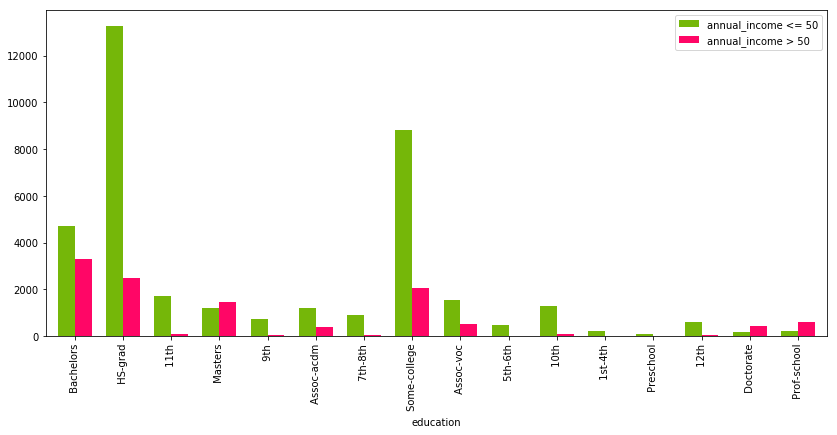

 Uhhh :( !! Bad look. I better normalize the data. Becuase as we have seen above the data has high variance. So Normalizetion will give us a better look to campare data distribution


In [30]:
printmd("#### Visualize graphical representation of the above destribution")
bar_colors = ["#75b709", "#ff0666"] # COLORS FOR BAR GRAPH
education_anual_income_distribution_DF.plot(figsize = (14,6), x='education', 
                                            y=['annual_income <= 50', 'annual_income > 50'],
                                            kind='bar', width = 0.7, color = bar_colors)
plt.show()
print(print_color_red, "Uhhh :( !! Bad look. I better normalize the data. Becuase as we have seen above the data has \
high variance. So Normalizetion will give us a better look to campare data distribution")

#### Normilize and plot the distribution accross anual income

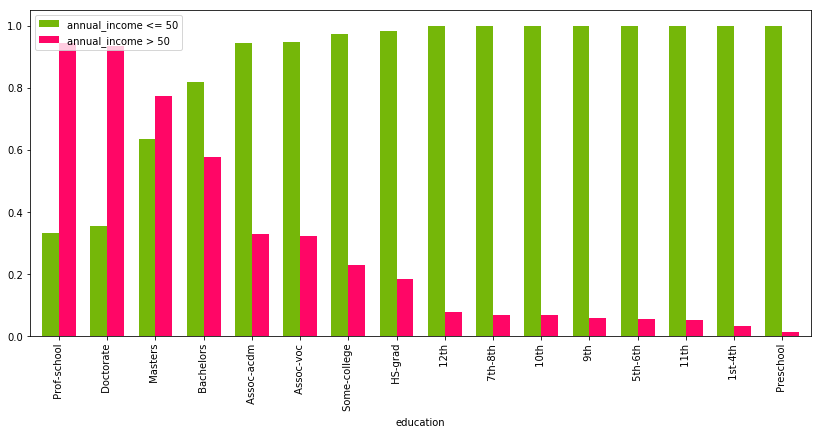

#### It is better now!!

In [31]:
printmd("#### Normilize and plot the distribution accross anual income")
education_distr_to_be_normalizad = education_anual_income_distribution_DF.iloc[:, 1:3].values 
normalized_education_distribution = preprocessing.normalize(education_distr_to_be_normalizad)
#xxxx=xyz.sort_values('x')
normalized_education_distribution_DF = pd .DataFrame(normalized_education_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
normalized_education_distribution_DF.insert(loc=0, column = 'education', value = education_values)
normalized_education_distribution_DF = normalized_education_distribution_DF.reindex()
normalized_education_distribution_DF=normalized_education_distribution_DF.sort_values('annual_income <= 50')
normalized_education_distribution_DF.plot(x="education", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, figsize = (14,6), color = bar_colors)
plt.show()
printmd('#### It is better now!!')

#### The distribution of 'workclass' across the class values of anual_income

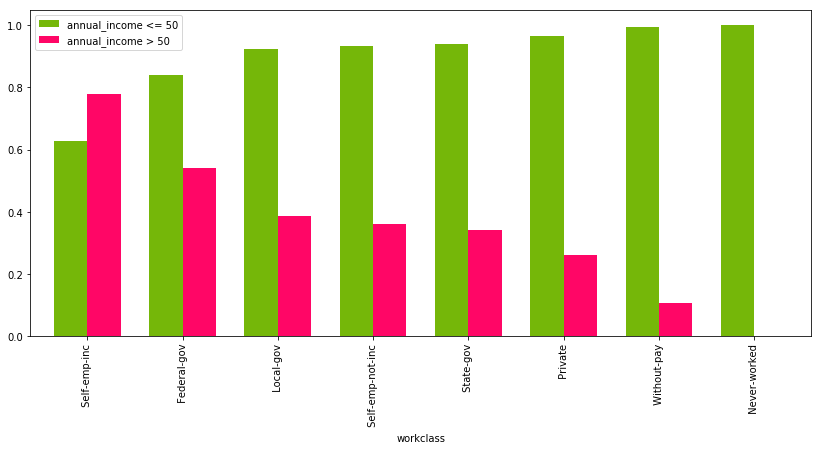

In [32]:
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF WORKCLASS ATTRIUTE==============================
printmd("#### The distribution of 'workclass' across the class values of anual_income")
#adults_data_merged = adults_data_merged.reindex()
workclass_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["workclass"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["workclass"],sort=False).size()}
workclass_anual_income_distribution_DF = pd.DataFrame.from_dict(workclass_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
workclass_distr_to_be_normalizad = workclass_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_workclass_distribution = preprocessing.normalize(workclass_distr_to_be_normalizad)
normalized_workclass_distribution_DF = pd.DataFrame(normalized_workclass_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A WORKCLASS COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXIS VALUE============
workclass_values = workclass_anual_income_distribution_DF.index.tolist()
normalized_workclass_distribution_DF.insert(loc=0, column = 'workclass', value = workclass_values)
normalized_workclass_distribution_DF = normalized_workclass_distribution_DF.reindex()
normalized_workclass_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_workclass_distribution_DF.plot(x="workclass", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, figsize = (14,6), color = bar_colors)
plt.show()

 The distribution of 'sex' across the class values of anual_income


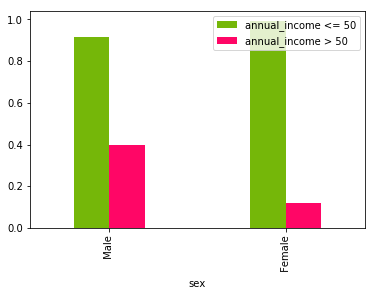

In [33]:
print(print_color_blue, "The distribution of 'sex' across the class values of anual_income")
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF SEX ATTRIBUTE====================================
sex_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["sex"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["sex"],sort=False).size()}
sex_anual_income_distribution_DF = pd.DataFrame.from_dict(sex_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
sex_distr_to_be_normalizad = sex_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_sex_distribution = preprocessing.normalize(sex_distr_to_be_normalizad)
normalized_sex_distribution_DF = pd.DataFrame(normalized_sex_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A SEX COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXIS VALUE============
sex_values = sex_anual_income_distribution_DF.index.tolist()
normalized_sex_distribution_DF.insert(loc=0, column = 'sex', value = sex_values)
normalized_sex_distribution_DF = normalized_sex_distribution_DF.reindex()
normalized_sex_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_sex_distribution_DF.plot(x="sex", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.4, color = bar_colors)
plt.show()

#### The distribution of 'marital_status' across the class values of anual_income

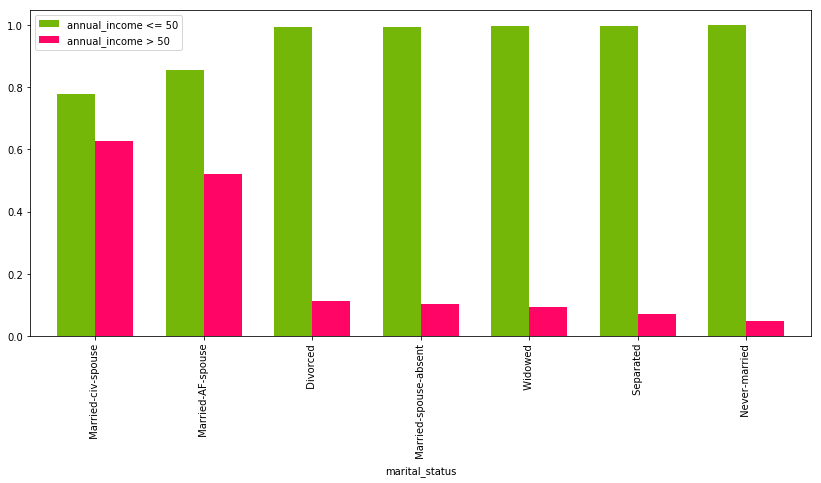

In [34]:
printmd("#### The distribution of 'marital_status' across the class values of anual_income")
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF marital_status ==========================================
marital_status_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["marital_status"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["marital_status"],sort=False).size()}
marital_status_anual_income_distribution_DF = pd.DataFrame.from_dict(marital_status_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
marital_status_distr_to_be_normalizad = marital_status_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_marital_status_distribution = preprocessing.normalize(marital_status_distr_to_be_normalizad)
normalized_marital_status_distribution_DF = pd.DataFrame(normalized_marital_status_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A marital_status COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXIS VALUE============
marital_status_values = marital_status_anual_income_distribution_DF.index.tolist()
normalized_marital_status_distribution_DF.insert(loc=0, column = 'marital_status', value = marital_status_values)
normalized_marital_status_distribution_DF = normalized_marital_status_distribution_DF.reindex()
normalized_marital_status_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_marital_status_distribution_DF.plot(x="marital_status", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, figsize = (14,6), color = bar_colors)
plt.show()

#### The distribution of 'occupation' across the class values of anual_income

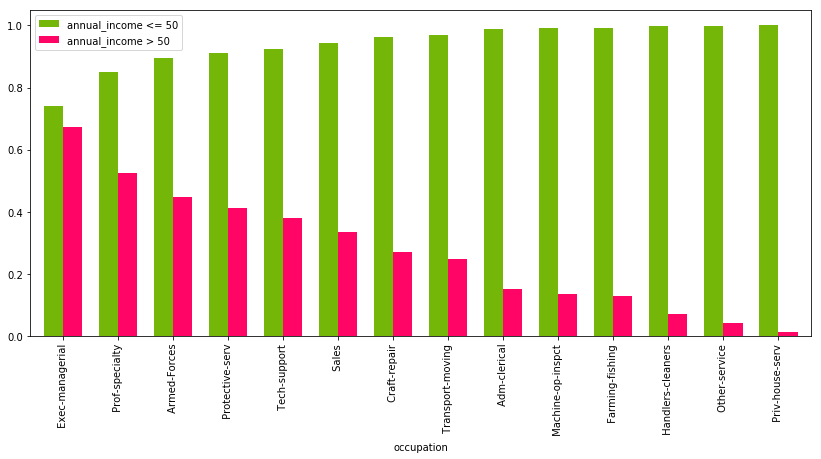

In [35]:
printmd("#### The distribution of 'occupation' across the class values of anual_income")
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF occupation ==========================================
occupation_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["occupation"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["occupation"],sort=False).size()}
occupation_anual_income_distribution_DF = pd.DataFrame.from_dict(occupation_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
occupation_distr_to_be_normalizad = occupation_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_occupation_distribution = preprocessing.normalize(occupation_distr_to_be_normalizad)
normalized_occupation_distribution_DF = pd.DataFrame(normalized_occupation_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A occupation COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXES VALUE============
occupation_values = occupation_anual_income_distribution_DF.index.tolist()
normalized_occupation_distribution_DF.insert(loc=0, column = 'occupation', value = occupation_values)
normalized_occupation_distribution_DF = normalized_occupation_distribution_DF.reindex()
normalized_occupation_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_occupation_distribution_DF.plot(x="occupation", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, figsize = (14,6), color = bar_colors)
plt.show()

#### The distribution of 'relationship' across the class values of anual_income

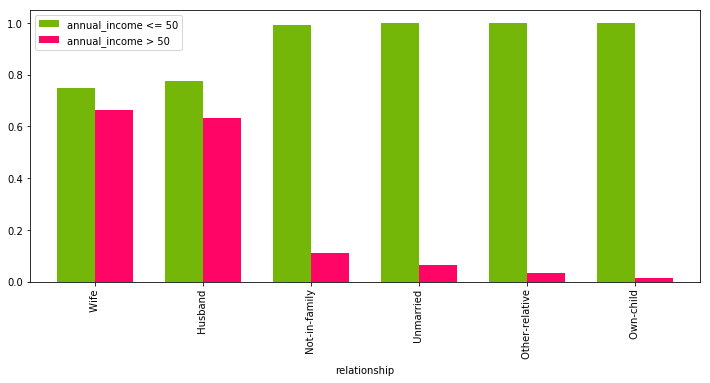

In [36]:
printmd("#### The distribution of 'relationship' across the class values of anual_income")
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF relationship ==========================================
relationship_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["relationship"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["relationship"],sort=False).size()}
relationship_anual_income_distribution_DF = pd.DataFrame.from_dict(relationship_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
relationship_distr_to_be_normalizad = relationship_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_relationship_distribution = preprocessing.normalize(relationship_distr_to_be_normalizad)
normalized_relationship_distribution_DF = pd.DataFrame(normalized_relationship_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A relationship COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXES VALUE============
relationship_values = relationship_anual_income_distribution_DF.index.tolist()
normalized_relationship_distribution_DF.insert(loc=0, column = 'relationship', value = relationship_values)
normalized_relationship_distribution_DF = normalized_relationship_distribution_DF.reindex()
normalized_relationship_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_relationship_distribution_DF.plot(x="relationship", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, figsize = (12,5), color = bar_colors)
plt.show()

#### The distribution of 'race' across the class values of anual_income

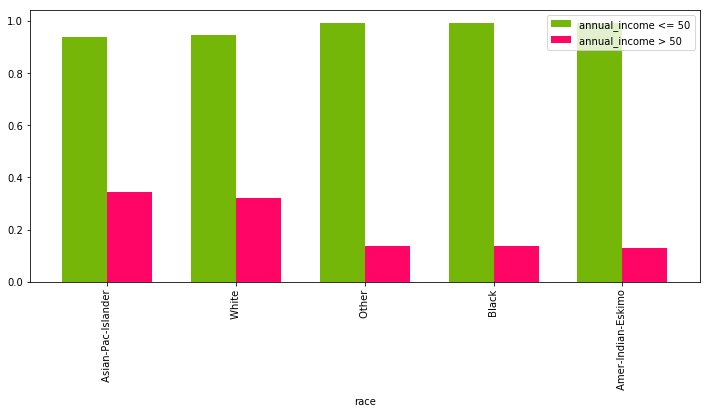

In [37]:
printmd("#### The distribution of 'race' across the class values of anual_income")
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF race ==========================================
race_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["race"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["race"],sort=False).size()}
race_anual_income_distribution_DF = pd.DataFrame.from_dict(race_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
race_distr_to_be_normalizad = race_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_race_distribution = preprocessing.normalize(race_distr_to_be_normalizad)
normalized_race_distribution_DF = pd.DataFrame(normalized_race_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A race COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXES VALUE============
race_values = race_anual_income_distribution_DF.index.tolist()
normalized_race_distribution_DF.insert(loc=0, column = 'race', value = race_values)
normalized_race_distribution_DF = normalized_race_distribution_DF.reindex()
normalized_race_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_race_distribution_DF.plot(x="race", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, color = bar_colors, figsize = (12,5))
plt.show()

#### The distribution of 'native_country' across the class values of anual_income

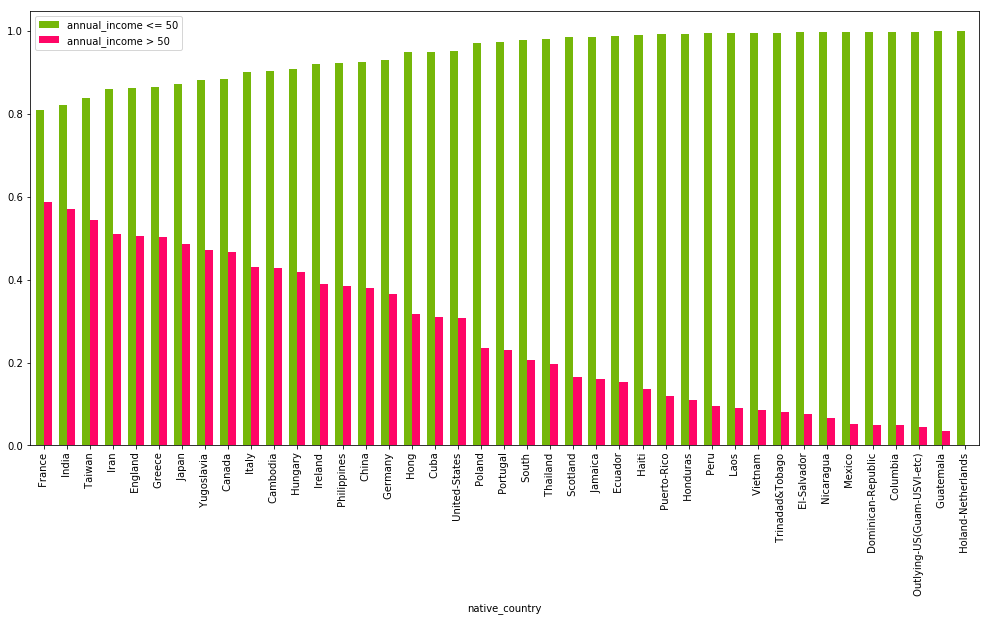

In [38]:
printmd("#### The distribution of 'native_country' across the class values of anual_income")
#===========================CREATE A DATAFRAME FOR DISTRIBUTION OF native_country ==========================================
native_country_anual_income_distribution = {
    'annual_income <= 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' <=50K'))].
    groupby(["native_country"],sort=False).size(),
    'annual_income > 50':adults_data_merged[(adults_data_merged.anual_income.str.contains(' >50K'))].
    groupby(["native_country"],sort=False).size()}
native_country_anual_income_distribution_DF = pd.DataFrame.from_dict(native_country_anual_income_distribution)
#==========================NORMALIZE THE DATA======================================================================
native_country_distr_to_be_normalizad = native_country_anual_income_distribution_DF.iloc[:, 0:2].values
normalized_native_country_distribution = preprocessing.normalize(native_country_distr_to_be_normalizad)
normalized_native_country_distribution_DF = pd.DataFrame(normalized_native_country_distribution, 
                                                     columns=['annual_income <= 50','annual_income > 50'])
#=========================ADD A native_country COLUMN TO NORMALIZED DATEFRAME, I WILL USE IT AS X AXES VALUE============
native_country_values = native_country_anual_income_distribution_DF.index.tolist()
normalized_native_country_distribution_DF.insert(loc=0, column = 'native_country', value = native_country_values)
normalized_native_country_distribution_DF = normalized_native_country_distribution_DF.reindex()
normalized_native_country_distribution_DF.sort_values('annual_income <= 50', inplace=True)
# ==========================PLOT THE DISTRIBUTION GRAPG=============================================================
normalized_native_country_distribution_DF.plot(x="native_country", y=['annual_income <= 50', 'annual_income > 50']
                                       , kind="bar", width=0.7, figsize = (17,8), color = bar_colors)
plt.show()

In [39]:
printmd('## Data Preparation')
print(print_bold, "As we have seen some of the features are categorical. In order to train our algorithms we need to \
transform into numeric. In this project I will be using one-hot encoding to transform the categorical features \
to binary feature.")

## Data Preparation

 As we have seen some of the features are categorical. In order to train our algorithms we need to transform into numeric. In this project I will be using one-hot encoding to transform the categorical features to binary feature.


In [40]:
# DROP THE FEATURE CLASS
adult_wout_label_col = adults_data_merged.drop(columns = ['anual_income'])
adult_label_col = adults_data_merged.anual_income
# ONE HOT-ENCODING
adult_data_integer = adult_wout_label_col.select_dtypes(exclude = 'category')
adult_one_hot = pd.get_dummies(adult_wout_label_col.select_dtypes('category'))
adult_one_hot_and_integer = pd.concat([adult_data_integer, adult_one_hot], axis=1, join='inner')

In [41]:
print(print_color_blue, "Total numbers of features after one-hot encoding is:")
adult_one_hot_and_integer.shape[1]

 Total numbers of features after one-hot encoding is:


105

In [42]:
print(print_color_cyan, "Now I am going to split my dataset into test and train datasets. Splitting the dataset \
need to be carefully performed. Usually the accuracy of one test set becomes much different from another test set randomly \
taken from the same dataset. Therefore spliting the test dataset into many test sets gives a better way to see how accurate \
our model is. However it reduce the size of our test set which also brings another issue on accuratly evaluation our model. \
Therefor the solution is to use K-FOLD sliting which splits the dataset into 'k' sets. use 'k-1' of the sets for \
training and '1' set for test on each iteration. In that way we can effectively use our dataset to evaluate our model.")

print(print_color_cyan, "\n I will be using 5 fold stratified split. I use stratified splitting because it samples the \
set uniformly from the whole dataset. The whole dataset is divided into stratas and randomly take the samples from each \
strata. It gives samples which better represent the population dataset")

 Now I am going to split my dataset into test and train datasets. Splitting the dataset need to be carefully performed. Usually the accuracy of one test set becomes much different from another test set randomly taken from the same dataset. Therefore spliting the test dataset into many test sets gives a better way to see how accurate our model is. However it reduce the size of our test set which also brings another issue on accuratly evaluation our model. Therefor the solution is to use K-FOLD sliting which splits the dataset into 'k' sets. use 'k-1' of the sets for training and '1' set for test on each iteration. In that way we can effectively use our dataset to evaluate our model.
 
 I will be using 5 fold stratified split. I use stratified splitting because it samples the set uniformly from the whole dataset. The whole dataset is divided into stratas and randomly take the samples from each strata. It gives samples which better represent the population dataset


In [43]:
# NOW I WILL DO A 5-FOLD SPLIT OF MY DATA WITH STRATIFIED METHOD (SINCE MY DATASET CLASSES ARE HIGHLY UNBALANCED
# I FOUND IT IS BETTER TO SPLIT IT WITH STRATIFICATION TO REPRESENT EACH CLASS EQUALLY)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
adult_X_train=[]
adult_X_test=[]
adult_Y_train=[]
adult_Y_test=[]
for train_index, test_index in skf.split(adult_one_hot_and_integer, adult_label_col):
    xtr,xtst = adult_one_hot_and_integer.loc[train_index],adult_one_hot_and_integer.loc[test_index]
    ytr,ytst = adult_label_col.loc[train_index],adult_label_col.loc[test_index]
    adult_X_train.append(xtr)
    adult_X_test.append(xtst)
    adult_Y_train.append(ytr)
    adult_Y_test.append(ytst)

In [44]:
# AS SHOWN ABOVE ON THE GRAPHS, SOME OF FEATURES ARE HIGHLY IMBALANCED. SO FOR BETTER PREDICTION WE NEED TO NORMALIZE THE DATASET   
my_scaler = StandardScaler()  

# FIT THE TRAIN DATA IN THE SCALER AND THEN TRANSFORM THE TEST DATA WITH SAME TRANSFORMATION
ind = 0
while ind < len(adult_X_train):
    my_scaler.fit(adult_X_train[ind])  
    adult_X_train[ind] = my_scaler.transform(adult_X_train[ind])  

# THEN TRANSFORM TEST DATA
    adult_X_test[ind] = my_scaler.transform(adult_X_test[ind])
    ind+=1

In [49]:
printmd("## Hyper-parameter Tuning")

## Hyper-parameter Tuning

In [50]:
# DECISION TREE HYPERPARAMETER TUNING
DT_train_tuning = tree.DecisionTreeClassifier()
dt_param_dist={'min_samples_split': randint(2,10),
               'criterion':['gini','entropy'],
               'min_samples_leaf':randint(1,10)
              }
DT_train_rdm_search = RandomizedSearchCV(DT_train_tuning, param_distributions=dt_param_dist, n_jobs=-1, n_iter=20, cv=2)
start = time()
DT_train_rdm_search.fit(adult_X_train[0],adult_Y_train[0])
print(print_color_blue,'Decision Tree hyperparameter-tuning time : %d seconds' % (time()-start))
print("Best Parameter for Decision Tree " + str(DT_train_rdm_search.best_params_))
print('Hyper-tuned model score: ' + str(DT_train_rdm_search.best_score_))

 Decision Tree hyperparameter-tuning time : 49 seconds
Best Parameter for Decision Tree {'criterion': 'entropy', 'min_samples_leaf': 8, 'min_samples_split': 9}
Hyper-tuned model score: 0.8420904460880915


In [51]:
# ADABOOST HYPERPARAMETER TUNING
ADA_train_tuning = AdaBoostClassifier()
ada_param_dist={'learning_rate':[0.1,0.25,0.5,0.75,1.],
            'n_estimators':[100,250,500,650],
            }
ADA_train_rdm_search = RandomizedSearchCV(ADA_train_tuning,param_distributions = ada_param_dist,cv=2,n_iter = 20,n_jobs=-1)
start = time()
ADA_train_rdm_search.fit(adult_X_train[0],adult_Y_train[0])
print(print_color_blue,'Adaboost hyperparameter-tuning time : %d seconds' % (time()-start))
print("Best Parameter for Adaboost " + str(ADA_train_rdm_search.best_params_))
print('Hyper-tuned model score: ' + str(ADA_train_rdm_search.best_score_))

 Adaboost hyperparameter-tuning time : 4944 seconds
Best Parameter for Adaboost {'n_estimators': 650, 'learning_rate': 1.0}
Hyper-tuned model score: 0.8702428787142016


In [64]:
ANN_train_tuning = MLPClassifier(hidden_layer_sizes=(5, 2),  solver='adam',
                           alpha=1e-1, random_state=1, learning_rate  = 'invscaling')
ann_param_dist = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'batch_size': [10,15,25,32,40,50],   
          'learning_rate_init':[0.05,0.1,0.2],
         'warm_start':['True','False']}
ANN_train_rdm_search = RandomizedSearchCV(ANN_train_tuning,param_distributions = ann_param_dist,cv=2,n_iter = 20,n_jobs=-1)
start = time()
ANN_train_rdm_search.fit(adult_X_train[0],adult_Y_train[0])
print(print_color_blue,'Artificial Neural Network hyperparameter-tuning time : %d seconds' % (time()-start))
print("Best Parameter for Artificial Neural Network " + str(ANN_train_rdm_search.best_params_))
print('Hyper-tuned model score: ' + str(ANN_train_rdm_search.best_score_))

 Artificial Neural Network hyperparameter-tuning time : 49843 seconds
Best Parameter for Artificial Neural Network {'warm_start': 'True', 'learning_rate_init': 0.05, 'batch_size': 40, 'activation': 'relu'}
Hyper-tuned model score: 0.8357177590663629


In [54]:
# RANDOMFOREST HYPERPARAMETER TUNING
RF_train_tuning = RandomForestClassifier(n_jobs=-1, n_estimators=500)
rf_param_dist={'max_depth':[3,5,10,None],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,10)
              }
RF_train_rdm_search = RandomizedSearchCV(RF_train_tuning,param_distributions = rf_param_dist,cv=2,n_iter = 20,n_jobs=-1)
start = time()
RF_train_rdm_search.fit(adult_X_train[0],adult_Y_train[0])
print(print_color_blue,'Random Forest hyperparameter-tuning time : %d seconds' % (time()-start))
print("Best Parameter for Random Forest " + str(RF_train_rdm_search.best_params_))
print('Hyper-tuned model score: ' + str(RF_train_rdm_search.best_score_))

 Random Forest hyperparameter-tuning time : 1751 seconds
Best Parameter for Random Forest {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}
Hyper-tuned model score: 0.8632047705576741


In [63]:
LRG_train_tuning = LogisticRegression(dual = False, tol = 1e-4)
lrg_param_dist = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20, 25),
    'solver' : ['liblinear']}
LRG_train_rdm_search = RandomizedSearchCV(LRG_train_tuning,param_distributions = lrg_param_dist,cv=2,n_iter = 20,n_jobs=-1)
start = time()
LRG_train_rdm_search.fit(adult_X_train[0],adult_Y_train[0])
print(print_color_blue,'Logistic Regression hyperparameter-tuning time : %d seconds' % (time()-start))
print("Best Parameter for Logistic Regression " + str(LRG_train_rdm_search.best_params_))
print('Hyper-tuned model score: ' + str(LRG_train_rdm_search.best_score_))

 Logistic Regression hyperparameter-tuning time : 518 seconds
Best Parameter for Logistic Regression {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.23357214690901212}
Hyper-tuned model score: 0.8513551557341387


In [84]:
printmd('# Model developing')
printmd('Now let us develope the models. we will be using decision tree, artificial neural network,\
Logistic Regression, and Ensemble Models (Random forest, Adaboost)')

# Model developing

Now let us develope the models. we will be using decision tree, artificial neural network,Logistic Regression, and Ensemble Models (Random forest, Adaboost)

In [47]:
def evaluator(test_label, predicted):
    
    conf_matrix = pd.crosstab(test_label, predicted, rownames=['test_label'], colnames=['Predicted'])
 #=================== Calculate Precision, Recall and Other measures ===============
    TPos = conf_matrix.loc[' >50K',' >50K']
    TNeg = conf_matrix.loc[' <=50K',' <=50K']
    FPos = conf_matrix.loc[' <=50K',' >50K']
    FNeg = conf_matrix.loc[' >50K',' <=50K']

    precision = (TPos)/(TPos+FPos)
    recall = (TPos)/(TPos+FNeg)
    accuracy = ((TPos+TNeg))/(TPos+FNeg+FPos+TNeg)
    fmeasure = (2*precision*recall)/(precision+recall)
    err_rate = 1 - accuracy
    
    ret_val = {}
    ret_val['accuracy'] =  accuracy
    ret_val['precision'] = precision
    ret_val['recall'] = recall
    ret_val['fmeasure'] = fmeasure
    ret_val['error_rate'] = err_rate
    
    return ret_val

In [49]:
def confu_matrix(aa,bb, splits):
    conf_matrix = pd.crosstab(aa,bb, rownames=['test_label'], colnames=['Predicted'])
    classes=adult_label_col.unique()
    confusion_matrix_norm=conf_matrix.values
    confusion_matrix_norm = confusion_matrix_norm.astype('float') / confusion_matrix_norm.sum(axis=1)[:, np.newaxis]
    confusion_matrix_norm = confusion_matrix_norm.astype('float') / confusion_matrix_norm.sum(axis=1)[:, np.newaxis]
    ax= plt.subplot(1,5 ,splits+1)
    im = ax.imshow(confusion_matrix_norm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(confusion_matrix_norm.shape[1]),
           yticks=np.arange(confusion_matrix_norm.shape[0]),
           xticklabels=classes, yticklabels= classes,
           ylabel='True label',
           xlabel='Predicted label')
     # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = confusion_matrix_norm.max() / 2.
    for i in range(confusion_matrix_norm.shape[0]):
        for j in range(confusion_matrix_norm.shape[1]):
            ax.text(j, i, format(confusion_matrix_norm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if confusion_matrix_norm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.title('Split - %d' %(splits + 1))
    

 ====================== ACCURACY OF DECISION TREE CLASSIFIER FOR K-FOLD SPLIT 1  ==============
 Accuracy of Decision Tree with entropy for split 1 is : 84.55 percent.
 ====================== ACCURACY OF DECISION TREE CLASSIFIER FOR K-FOLD SPLIT 2  ==============
 Accuracy of Decision Tree with entropy for split 2 is : 83.48 percent.
 ====================== ACCURACY OF DECISION TREE CLASSIFIER FOR K-FOLD SPLIT 3  ==============
 Accuracy of Decision Tree with entropy for split 3 is : 84.66 percent.
 ====================== ACCURACY OF DECISION TREE CLASSIFIER FOR K-FOLD SPLIT 4  ==============
 Accuracy of Decision Tree with entropy for split 4 is : 85.25 percent.
 ====================== ACCURACY OF DECISION TREE CLASSIFIER FOR K-FOLD SPLIT 5  ==============
 Accuracy of Decision Tree with entropy for split 5 is : 84.13 percent.


,accuracy,error_rate,fmeasure,precision,recall
SPLIT 4,0.85250,0.14750,0.66900,0.7222,0.62300
SPLIT 3,0.84660,0.15340,0.65670,0.7070,0.61320
SPLIT 1,0.84550,0.15450,0.65370,0.7053,0.60910
SPLIT 5,0.84130,0.15870,0.63920,0.7009,0.58750
SPLIT 2,0.83480,0.16520,0.63270,0.6761,0.59450
DT_AVG,0.84414,0.15586,0.65026,0.7023,0.60546


 ====================== AVERAGE ACCURACY OF DECISION TREE CLASSIFIER WITH 5-FOLD ==============

 DECISION TREE AVERAGE ACCURACY 0.8442 
STANDARD DEVIATION OF ACCURACIES OF DECISION TREE ALGORITHM FOR THE FIVE SPLITS 0.0059 
 
==== CONFUSION MATRIX FOR DECISION TREE NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====


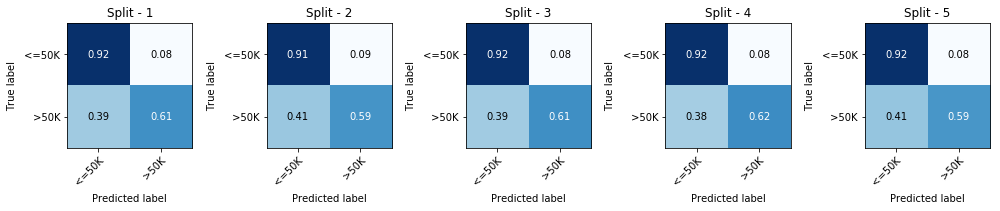

In [62]:
# NOW WE ARE GOING TO TRAIN OUR FIRST CLASSIFIER DECISION TREE AND SEE THE PREDICTION
# THE HYPER-PARAMETERS OF THE CLASSIFIER ARE THOSE GOTTEN FROM BEST PARAMETERS OF HYPER-PARAMETER TUNING ABOVE FOR D. TREE
DT_cv_trains =[]
DT_cv_predicts =[]
DT_accuracy_total=[]
DT_error_rate_total=[]
DT_precision_total=[]
DT_recall_total=[]
DT_predicts=[]
DT_stat = pd.DataFrame(columns=['accuracy','error_rate','fmeasure','precision','recall'])
DT_train = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 8, min_samples_split = 9)
i=0
while i < len(adult_X_train):
    DT_train = DT_train.fit(adult_X_train[i], adult_Y_train[i])
    DT_predict = DT_train.predict(adult_X_test[i])
    DT_cv_trains.append(DT_train)
    DT_cv_predicts.append(DT_predict)  
    
    print(print_color_blue, "================= ACCURACY OF DECISION TREE CLASSIFIER FOR K-FOLD SPLIT %d " %(i+1)+" ========")
    DT_train_evaluate = evaluator(adult_Y_test[i], DT_predict)
    evaluation_of_DT = round(pd.DataFrame([DT_train_evaluate], index = ['SPLIT %d'%(i+1)]),4)
    DT_stat = pd.concat([DT_stat, evaluation_of_DT],axis=0)
    #display(evaluation_of_DT)
    
    DT_accuracy_total.append(DT_train_evaluate['accuracy'])
    DT_error_rate_total.append(DT_train_evaluate['error_rate'])
    DT_precision_total.append(DT_train_evaluate['precision'])
    DT_recall_total.append(DT_train_evaluate['recall'])
    print(print_color_green, 'Accuracy of Decision Tree with entropy for split %d is : %.2f percent.' % (i+1, round(DT_train_evaluate['accuracy']*100,2)))
    i+=1

DT_stat.sort_values(by = ['fmeasure', 'accuracy'], ascending = False, inplace = True)
DT_stat.loc['DT_AVG']=DT_stat.mean()
display(DT_stat)

print(print_color_blue, "====================== AVERAGE ACCURACY OF DECISION TREE CLASSIFIER WITH 5-FOLD ==============\n")
DT_AVERAGE_ACCURACY = np.mean(np.asarray(DT_accuracy_total))
DT_STANDARD_DEVIATION= np.std(np.asarray(DT_accuracy_total))
print(print_color_red, "DECISION TREE AVERAGE ACCURACY %.4f "%(DT_AVERAGE_ACCURACY))
print("STANDARD DEVIATION OF ACCURACIES OF DECISION TREE ALGORITHM FOR THE FIVE SPLITS %.4f "%(DT_STANDARD_DEVIATION))

print(print_color_cyan, "\n==== CONFUSION MATRIX FOR DECISION TREE NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====")
splits=0 
fig=plt.figure(figsize=(14,6))
while splits < 5:
    ax= fig.add_subplot(111)
    confu_matrix(adult_Y_test[splits], DT_cv_predicts[splits], splits)
    splits=splits+1
    

 ====================== SUMMARY OF ANN CLASSIFIER RESULT FOR 5-FOLD SPLIT 1  ==============
 Accuracy of Decision Tree with entropy for split 1 is : 84.90 percent.
 ====================== SUMMARY OF ANN CLASSIFIER RESULT FOR 5-FOLD SPLIT 2  ==============
 Accuracy of Decision Tree with entropy for split 2 is : 85.07 percent.
 ====================== SUMMARY OF ANN CLASSIFIER RESULT FOR 5-FOLD SPLIT 3  ==============
 Accuracy of Decision Tree with entropy for split 3 is : 85.20 percent.
 ====================== SUMMARY OF ANN CLASSIFIER RESULT FOR 5-FOLD SPLIT 4  ==============
 Accuracy of Decision Tree with entropy for split 4 is : 85.01 percent.
 ====================== SUMMARY OF ANN CLASSIFIER RESULT FOR 5-FOLD SPLIT 5  ==============
 Accuracy of Decision Tree with entropy for split 5 is : 85.17 percent.


,accuracy,error_rate,fmeasure,precision,recall
SPLIT 5,0.8517,0.1483,0.67300,0.71200,0.63800
SPLIT 1,0.8490,0.1510,0.67270,0.69890,0.64840
SPLIT 3,0.8520,0.1480,0.65440,0.74120,0.58580
SPLIT 2,0.8507,0.1493,0.62020,0.79240,0.50940
SPLIT 4,0.8501,0.1499,0.60690,0.81470,0.48350
ANN_AVG,0.8507,0.1493,0.64544,0.75184,0.57302


 ====================== AVERAGE DECISION TREE CLASSIFIER ACCURACY WITH K-FOLD ==============

 ANN AVERAGE ACCURACY 0.8507 
STANDARD DEVIATION OF ACCURACIES OF ANN ALGORITHM FOR THE FIVE SPLITS 0.0011 
 
==== CONFUSION MATRIX FOR ANN NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====


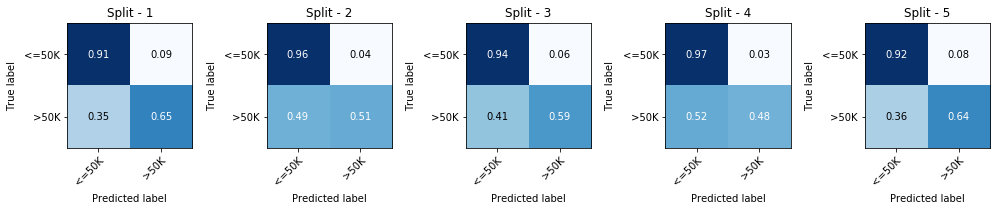

In [66]:
# ARTIFICIAL NEURAL NETWORK
#LET ME TRAIN ANN USING ACTIVATION RELU
# NOW LET ME TRAIN MY FIRST CLASSIFIER DECISION TREE AND SEE THE OUTPUT

ANN_cv_trains =[]
ANN_cv_predicts =[]
ANN_accuracy_total=[]
ANN_error_rate_total=[]
ANN_precision_total=[]
ANN_recall_total=[]
ANN_predicts=[]
ANN_stat = pd.DataFrame(columns=['accuracy','error_rate','fmeasure','precision','recall'])
ann_relu_train = MLPClassifier(hidden_layer_sizes=(5, 2),  solver='adam',
                           warm_start = True, learning_rate_init = 0.05, batch_size = 40, activation = 'relu')
i=0
while i < len(adult_X_train):
    ann_relu_train.fit(adult_X_train[i], adult_Y_train[i])                         
    ann_relu_pridict = ann_relu_train.predict(adult_X_test[i])
    ANN_cv_trains.append(ann_relu_train)
    ANN_cv_predicts.append(ann_relu_pridict) 
    
    print(print_color_blue, "================ SUMMARY OF ANN CLASSIFIER RESULT FOR 5-FOLD SPLIT %d " %(i+1)+" ============")
    
    ann_relu_evaluate = evaluator(adult_Y_test[i], ann_relu_pridict)
    evaluation_of_ANN = round(pd.DataFrame([ann_relu_evaluate], index = ['SPLIT %d'%(i+1)]),4)
    ANN_stat = pd.concat([ANN_stat, evaluation_of_ANN],axis=0)
    #display(evaluation_of_ann_relu)
    
    ANN_accuracy_total.append(ann_relu_evaluate['accuracy'])
    ANN_error_rate_total.append(ann_relu_evaluate['error_rate'])
    ANN_precision_total.append(ann_relu_evaluate['precision'])
    ANN_recall_total.append(ann_relu_evaluate['recall'])
    print(print_color_green, 'Accuracy of Decision Tree with entropy for split %d is : %.2f percent.' % (i+1, round(ann_relu_evaluate['accuracy']*100,2)))
    i+=1

ANN_stat.sort_values(by = ['fmeasure', 'accuracy'], ascending = False, inplace = True)
ANN_stat.loc['ANN_AVG']=ANN_stat.mean()
display(ANN_stat)

print(print_color_blue, "====================== AVERAGE DECISION TREE CLASSIFIER ACCURACY WITH K-FOLD ==============\n")
ANN_AVERAGE_ACCURACY = np.mean(np.asarray(ANN_accuracy_total))
ANN_STANDARD_DEVIATION= np.std(np.asarray(ANN_accuracy_total))
print(print_color_red, "ANN AVERAGE ACCURACY %.4f "%(ANN_AVERAGE_ACCURACY))
print("STANDARD DEVIATION OF ACCURACIES OF ANN ALGORITHM FOR THE FIVE SPLITS %.4f "%(ANN_STANDARD_DEVIATION))

print(print_color_cyan, "\n==== CONFUSION MATRIX FOR ANN NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====")
splits=0 
fig=plt.figure(figsize=(14,6))
while splits < 5:
    ax= fig.add_subplot(111)
    confu_matrix(adult_Y_test[splits], ANN_cv_predicts[splits], splits)
    splits=splits+1

 =============== ACCURACY OF LOGISTIC REGRESSION CLASSIFIER FOR K-FOLD SPLIT 1  ==============
 Accuracy of LOGISTIC REGRESSION for split 1 is : 85.17 percent.
 =============== ACCURACY OF LOGISTIC REGRESSION CLASSIFIER FOR K-FOLD SPLIT 2  ==============
 Accuracy of LOGISTIC REGRESSION for split 2 is : 85.01 percent.
 =============== ACCURACY OF LOGISTIC REGRESSION CLASSIFIER FOR K-FOLD SPLIT 3  ==============
 Accuracy of LOGISTIC REGRESSION for split 3 is : 85.11 percent.
 =============== ACCURACY OF LOGISTIC REGRESSION CLASSIFIER FOR K-FOLD SPLIT 4  ==============
 Accuracy of LOGISTIC REGRESSION for split 4 is : 85.45 percent.
 =============== ACCURACY OF LOGISTIC REGRESSION CLASSIFIER FOR K-FOLD SPLIT 5  ==============
 Accuracy of LOGISTIC REGRESSION for split 5 is : 85.16 percent.


,accuracy,error_rate,fmeasure,precision,recall
SPLIT 4,0.8545,0.1455,0.6692,0.7339,0.61490
SPLIT 3,0.8511,0.1489,0.6582,0.7303,0.59910
SPLIT 5,0.8516,0.1484,0.6557,0.7365,0.59090
SPLIT 1,0.8517,0.1483,0.6552,0.7383,0.58900
SPLIT 2,0.8501,0.1499,0.6532,0.7320,0.58980
LRG_AVG,0.8518,0.1482,0.6583,0.7342,0.59674


 ================= AVERAGE LOGISTIC REGRESSION CLASSIFIER ACCURACY WITH 5-FOLD ==============

 LOGISTIC REGRESSION AVERAGE ACCURACY 0.8518 
STANDARD DEVIATION OF ACCURACIES OF LOGISTIC REGRESSION ALGORITHM FOR THE FIVE SPLITS 0.0015 
 
==== CONFUSION MATRIX FOR LOGISTIC REGRESSION NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====


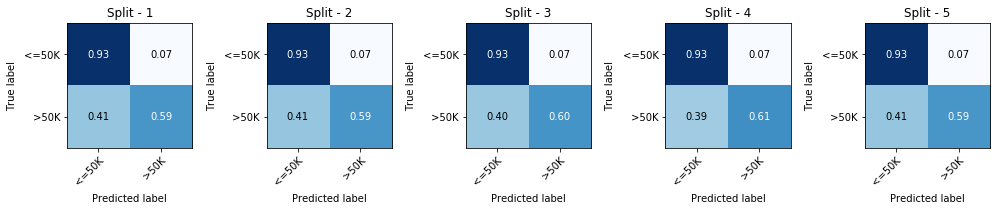

In [67]:
# LOGISTIC REGRESSION
LRG_cv_trains = []
LRG_cv_predicts =[]
LRG_accuracy_total=[]
LRG_error_rate_total=[]
LRG_precision_total=[]
LRG_recall_total=[]
LRG_predicts=[]
LRG_stat = pd.DataFrame(columns=['accuracy','error_rate','fmeasure','precision','recall'])
LRG_train = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.23357214690901212)
i=0
while i < len(adult_X_train):
    LRG_train.fit(adult_X_train[i], adult_Y_train[i])                         
    LRG_pridict = LRG_train.predict(adult_X_test[i]) 
    LRG_cv_trains.append(LRG_train)
    LRG_cv_predicts.append(LRG_pridict) 
    
    print(print_color_blue, "========= ACCURACY OF LOGISTIC REGRESSION CLASSIFIER FOR K-FOLD SPLIT %d " %(i+1)+" =========")
    LRG_evaluate = evaluator(adult_Y_test[i], LRG_pridict)
    evaluation_of_LRG = round(pd.DataFrame([LRG_evaluate], index = ['SPLIT %d'%(i+1)]),4)
    LRG_stat = pd.concat([LRG_stat, evaluation_of_LRG],axis=0)
    #display(evaluation_of_LRG)
    
    LRG_accuracy_total.append(LRG_evaluate['accuracy'])
    LRG_error_rate_total.append(LRG_evaluate['error_rate'])
    LRG_precision_total.append(LRG_evaluate['precision'])
    LRG_recall_total.append(LRG_evaluate['recall'])
    print(print_color_green, 'Accuracy of LOGISTIC REGRESSION for split %d is : %.2f percent.' % (i+1, round(LRG_evaluate['accuracy']*100,2)))
    i+=1

LRG_stat.sort_values(by = ['fmeasure', 'accuracy'], ascending = False, inplace = True)
LRG_stat.loc['LRG_AVG']=LRG_stat.mean()
display(LRG_stat)


print(print_color_blue, "================= AVERAGE LOGISTIC REGRESSION CLASSIFIER ACCURACY WITH 5-FOLD ==============\n")
LRG_AVERAGE_ACCURACY = np.mean(np.asarray(LRG_accuracy_total))
LRG_STANDARD_DEVIATION= np.std(np.asarray(LRG_accuracy_total))
print(print_color_red, "LOGISTIC REGRESSION AVERAGE ACCURACY %.4f "%(LRG_AVERAGE_ACCURACY))
print("STANDARD DEVIATION OF ACCURACIES OF LOGISTIC REGRESSION ALGORITHM FOR THE FIVE SPLITS %.4f "%(LRG_STANDARD_DEVIATION))

print(print_color_cyan, "\n==== CONFUSION MATRIX FOR LOGISTIC REGRESSION NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====")
splits=0 
fig=plt.figure(figsize=(14,6))
while splits < 5:
    ax= fig.add_subplot(111)
    confu_matrix(adult_Y_test[splits], LRG_cv_predicts[splits], splits)
    splits=splits+1

In [52]:
printmd("## Ensemble Models")
print(print_color_cyan, "First let us train adaboost")

## Ensemble Models

 First let us train adaboost


 =============== ACCURACY OF ADABOOST CLASSIFIER FOR K-FOLD SPLIT 1  ==============
 Accuracy of ADABOOST for split 1 is : 87.16 percent.
 =============== ACCURACY OF ADABOOST CLASSIFIER FOR K-FOLD SPLIT 2  ==============
 Accuracy of ADABOOST for split 2 is : 86.97 percent.
 =============== ACCURACY OF ADABOOST CLASSIFIER FOR K-FOLD SPLIT 3  ==============
 Accuracy of ADABOOST for split 3 is : 87.18 percent.
 =============== ACCURACY OF ADABOOST CLASSIFIER FOR K-FOLD SPLIT 4  ==============
 Accuracy of ADABOOST for split 4 is : 87.26 percent.
 =============== ACCURACY OF ADABOOST CLASSIFIER FOR K-FOLD SPLIT 5  ==============
 Accuracy of ADABOOST for split 5 is : 87.24 percent.


,accuracy,error_rate,fmeasure,precision,recall
SPLIT 4,0.87260,0.12740,0.71120,0.7773,0.6555
SPLIT 3,0.87180,0.12820,0.70900,0.7761,0.6525
SPLIT 5,0.87240,0.12760,0.70500,0.7891,0.6371
SPLIT 1,0.87160,0.12840,0.70470,0.7841,0.6399
SPLIT 2,0.86970,0.13030,0.70030,0.7789,0.6360
ADA_AVG,0.87162,0.12838,0.70604,0.7811,0.6442


 ================= AVERAGE ADABOOST CLASSIFIER ACCURACY WITH 5-FOLD ==============

 ADABOOST AVERAGE ACCURACY 0.8716 
STANDARD DEVIATION OF ACCURACIES OF ADABOOSOOT FOR THE FIVE SPLITS  0.0010 
 
==== CONFUSION MATRIX FOR ADABOOST NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====


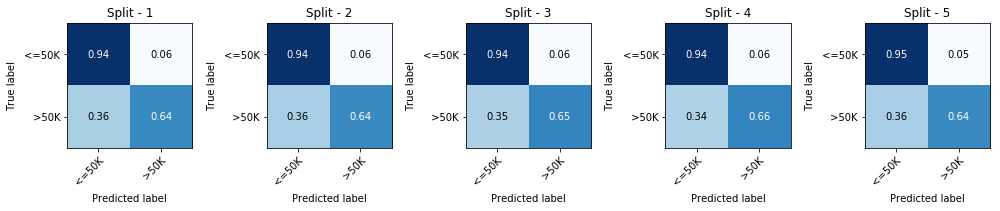

In [68]:
# ADABOOST
ADA_cv_trains = []
ADA_cv_predicts =[]
ADA_accuracy_total=[]
ADA_error_rate_total=[]
ADA_precision_total=[]
ADA_recall_total=[]
ADA_predicts=[]
ADA_stat = pd.DataFrame(columns=['accuracy','error_rate','fmeasure','precision','recall'])
adaboost_train = AdaBoostClassifier(n_estimators = 650, learning_rate = 1.0)
i=0
while i < len(adult_X_train):
    adaboost_train.fit(adult_X_train[i], adult_Y_train[i])                         
    ADA_pridict = adaboost_train.predict(adult_X_test[i]) 
    ADA_cv_trains.append(adaboost_train)
    ADA_cv_predicts.append(ADA_pridict) 
    
    print(print_color_blue, "============ ACCURACY OF ADABOOST CLASSIFIER FOR K-FOLD SPLIT %d " %(i+1)+" ==========")
    
    ADA_evaluate = evaluator(adult_Y_test[i], ADA_pridict)
    evaluation_of_ada = round(pd.DataFrame([ADA_evaluate], index = ['SPLIT %d'%(i+1)]),4)
    ADA_stat = pd.concat([ADA_stat, evaluation_of_ada],axis=0)
    #display(evaluation_of_ada)
    
    ADA_accuracy_total.append(ADA_evaluate['accuracy'])
    ADA_error_rate_total.append(ADA_evaluate['error_rate'])
    ADA_precision_total.append(ADA_evaluate['precision'])
    ADA_recall_total.append(ADA_evaluate['recall'])
    print(print_color_green, 'Accuracy of ADABOOST for split %d is : %.2f percent.' % (i+1, round(ADA_evaluate['accuracy']*100,2)))
    i+=1

ADA_stat.sort_values(by = ['fmeasure', 'accuracy'], ascending = False, inplace = True)
ADA_stat.loc['ADA_AVG']=ADA_stat.mean()
display(ADA_stat)

print(print_color_blue, "================= AVERAGE ADABOOST CLASSIFIER ACCURACY WITH 5-FOLD ==============\n")
ADA_AVERAGE_ACCURACY = np.mean(np.asarray(ADA_accuracy_total))
ADA_STANDARD_DEVIATION= np.std(np.asarray(ADA_accuracy_total))
print(print_color_red, "ADABOOST AVERAGE ACCURACY %.4f "%(ADA_AVERAGE_ACCURACY))
print("STANDARD DEVIATION OF ACCURACIES OF ADABOOST FOR THE FIVE SPLITS  %.4f "%(ADA_STANDARD_DEVIATION))

print(print_color_cyan, "\n==== CONFUSION MATRIX FOR ADABOOST NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====")
splits=0 
fig=plt.figure(figsize=(14,6))
while splits < 5:
    ax= fig.add_subplot(111)
    confu_matrix(adult_Y_test[splits], ADA_cv_predicts[splits], splits)
    splits=splits+1

 ============= ACCURACY OF RANDOM FOREST CLASSIFIER FOR 5-FOLD SPLIT 1  ============
 Accuracy of RANDOM FOREST for split 1 is : 86.38 percent.
 ============= ACCURACY OF RANDOM FOREST CLASSIFIER FOR 5-FOLD SPLIT 2  ============
 Accuracy of RANDOM FOREST for split 2 is : 86.06 percent.
 ============= ACCURACY OF RANDOM FOREST CLASSIFIER FOR 5-FOLD SPLIT 3  ============
 Accuracy of RANDOM FOREST for split 3 is : 86.00 percent.
 ============= ACCURACY OF RANDOM FOREST CLASSIFIER FOR 5-FOLD SPLIT 4  ============
 Accuracy of RANDOM FOREST for split 4 is : 86.76 percent.
 ============= ACCURACY OF RANDOM FOREST CLASSIFIER FOR 5-FOLD SPLIT 5  ============
 Accuracy of RANDOM FOREST for split 5 is : 86.21 percent.


,accuracy,error_rate,fmeasure,precision,recall
SPLIT 4,0.86760,0.13240,0.69240,0.77970,0.62260
SPLIT 1,0.86380,0.13620,0.68040,0.77560,0.60610
SPLIT 5,0.86210,0.13790,0.67580,0.77230,0.60080
SPLIT 2,0.86060,0.13940,0.67350,0.76610,0.60090
SPLIT 3,0.86000,0.14000,0.67230,0.76370,0.60030
RF_AVG,0.86282,0.13718,0.67888,0.77148,0.60614


 ================= AVERAGE RANDOM FOREST CLASSIFIER ACCURACY WITH 5-FOLD ==============

 RANDOM FOREST AVERAGE ACCURACY 0.8628 
STANDARD DEVIATION OF ACCURACIES OF RANDOM FOREST TREE ALGORITHM FOR THE FIVE SPLITS 0.0027 
 
==== CONFUSION MATRIX FOR RANDOM FOREST NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====


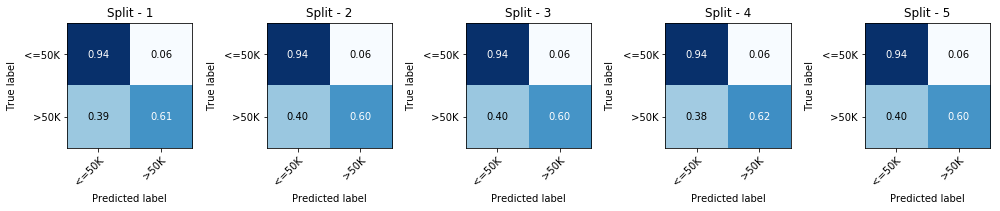

In [149]:
# RANDOM FOREST
RF_cv_trains = []
RF_cv_predicts =[]
RF_accuracy_total=[]
RF_error_rate_total=[]
RF_precision_total=[]
RF_recall_total=[]
RF_predicts=[]
RF_stat = pd.DataFrame(columns=['accuracy','error_rate','fmeasure','precision','recall'])
RF_train = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth = None, min_samples_leaf = 4)
i=0
while i < len(adult_X_train):
    RF_train.fit(adult_X_train[i], adult_Y_train[i])                         
    RF_pridict = RF_train.predict(adult_X_test[i]) 
    RF_cv_trains.append(RF_train)
    RF_cv_predicts.append(RF_pridict) 
    
    print(print_color_blue, "============= ACCURACY OF RANDOM FOREST CLASSIFIER FOR 5-FOLD SPLIT %d " %(i+1)+" ============")
    RF_evaluate = evaluator(adult_Y_test[i], RF_pridict)
    evaluation_of_RF = round(pd.DataFrame([RF_evaluate], index = ['SPLIT %d'%(i+1)]),4)
    RF_stat = pd.concat([RF_stat, evaluation_of_RF],axis=0)
    #display(evaluation_of_RF)
    
    RF_accuracy_total.append(RF_evaluate['accuracy'])
    RF_error_rate_total.append(RF_evaluate['error_rate'])
    RF_precision_total.append(RF_evaluate['precision'])
    RF_recall_total.append(RF_evaluate['recall'])
    print(print_color_green, 'Accuracy of RANDOM FOREST for split %d is : %.2f percent.' % (i+1, round(RF_evaluate['accuracy']*100,2)))
    i+=1
    
RF_stat.sort_values(by = ['fmeasure', 'accuracy'], ascending = False, inplace = True)
RF_stat.loc['RF_AVG']=RF_stat.mean()
display(RF_stat)

print(print_color_blue, "================= AVERAGE RANDOM FOREST CLASSIFIER ACCURACY WITH 5-FOLD ==============\n")
RF_AVERAGE_ACCURACY = np.mean(np.asarray(RF_accuracy_total))
RF_STANDARD_DEVIATION= np.std(np.asarray(RF_accuracy_total))
print(print_color_red, "RANDOM FOREST AVERAGE ACCURACY %.4f "%(RF_AVERAGE_ACCURACY))
print("STANDARD DEVIATION OF ACCURACIES OF RANDOM FOREST TREE ALGORITHM FOR THE FIVE SPLITS %.4f "%(RF_STANDARD_DEVIATION))

print(print_color_cyan, "\n==== CONFUSION MATRIX FOR RANDOM FOREST NORMALIZED BY CLASS SUPPORT SIZE (NUMBER OF ELEMENTS IN EACH CLASS) =====")
splits=0 
fig=plt.figure(figsize=(14,6))
while splits < 5:
    ax= fig.add_subplot(111)
    confu_matrix(adult_Y_test[splits], RF_cv_predicts[splits], splits)
    splits=splits+1

In [150]:
printmd("## MODEL EVALUATION")

## MODEL EVALUATION

In [163]:
# SUMMARISE THE PERFORMANCE MEASURE OF ALL CLASSIFIERS
print(print_color_blue,"\n\t\t   Evaluation summary all classifiers")
evaluation_all = pd.concat([ANN_stat.tail(1), DT_stat.tail(1),
                            ADA_stat.tail(1), RF_stat.tail(1), LRG_stat.tail(1)], axis = 0)
evaluation_all.rename(index={'DT_AVG':'DECISION TREE',
                      'ANN_AVG':'ARTIFICIAL NN',
                      'ADA_AVG':'ADABOOST',
                      'RF_AVG':'RANDOM FOREST',
                      'LRG_AVG':'LOGISTIC REGRESSION'}, inplace=True)
evaluation_all.sort_values(by = ['fmeasure', 'accuracy'], ascending = False, inplace = True)

display(evaluation_all)
print(print_color_blue,"The table above is sorted by accuracy and fmeasure. As we see ADABOOST is the best of all with its \
Accuracy and f_measure.\n Next to Adaboost, RANDOM FOREST is best classifier than the rest of others")

 
		   Evaluation summary all classifiers


,accuracy,error_rate,fmeasure,precision,recall
ADABOOST,0.87162,0.12838,0.70604,0.78110,0.64420
RANDOM FOREST,0.86282,0.13718,0.67888,0.77148,0.60614
LOGISTIC REGRESSION,0.85180,0.14820,0.65830,0.73420,0.59674
DECISION TREE,0.84414,0.15586,0.65026,0.70230,0.60546
ARTIFICIAL NN,0.85070,0.14930,0.64544,0.75184,0.57302


 The table above is sorted by accuracy and fmeasure. As we see ADABOOST is the best of all with its Accuracy and f_measure.
 Next to Adaboost, RANDOM FOREST is best classifier than the rest of others


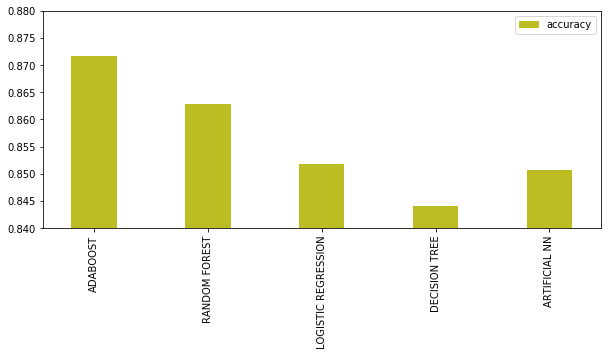

 As we see from the graph, ADABOOST has predicted with the best accuracy than others. Next to Adaboost, Random 
 forest is best compared with others. That means ENSEMBLE models have out-performed other models. Logistic 
 regression and ANN has predicted our test lables with relatively similar accuracy (the difference is very small). 
 Decision Tree is the worst classifier of all for our dataset


In [203]:
# THIS GRAPH SHOWS THE AVERAGE ACURACY ACHIEVED BY THE CLASSIFIERS
xd=pd.DataFrame(evaluation_all['accuracy'])
xd.plot(ylim=(0.84,0.88),kind="bar", width=0.4, figsize = (10,4), color = 'tab:olive')
plt.show()
print(print_color_blue,'As we see from the graph, ADABOOST has predicted with the best accuracy than others. Next to Adaboost, \
Random \n forest is best compared with others. That means ENSEMBLE models have out-performed other models. Logistic \n \
regression and ANN has predicted our test lables with relatively similar accuracy (the difference is very small). \n \
Decision Tree is the worst classifier of all for our dataset')

In [204]:
# ALL TRAINS AND PREDICTS BY ALL MODELS ABOVE FOR ALL SPLITS
my_trainers_for_split = []
my_trainers_for_splits_all = []
i=0
while i < 5:    
    my_trainers_for_split.append(DT_cv_trains[i])
    my_trainers_for_split.append(ANN_cv_trains[i])
    my_trainers_for_split.append(LRG_cv_trains[i])
    my_trainers_for_split.append(ADA_cv_trains[i])
    my_trainers_for_split.append(RF_cv_trains[i]) 
    my_trainers_for_splits_all.append(my_trainers_for_split)
    my_trainers_for_split = []
    i=i+1

my_predictors_for_split = []
my_predictors_for_splits_all = []
i=0
while i < 5:
    my_predictors_for_split.append(DT_cv_predicts[i])
    my_predictors_for_split.append(ANN_cv_predicts[i])
    my_predictors_for_split.append(LRG_cv_predicts[i])
    my_predictors_for_split.append(ADA_cv_predicts[i])
    my_predictors_for_split.append(RF_cv_predicts[i]) 
    my_predictors_for_splits_all.append(my_predictors_for_split)
    my_predictors_for_split = []
    i=i+1

### ROC Curves for each model per each split

 As AUC area becomes the more closer to 1, it is the more accurate, and the more closer to 0 the least accurate it is


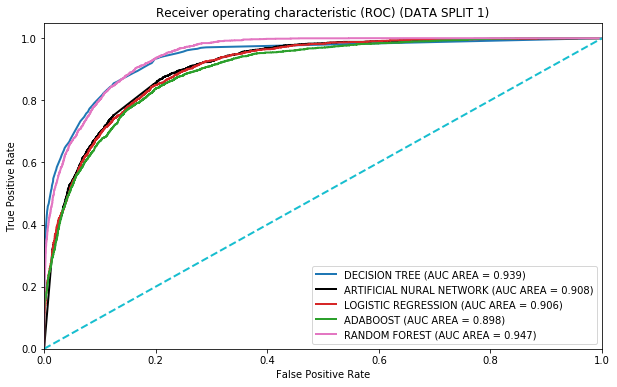

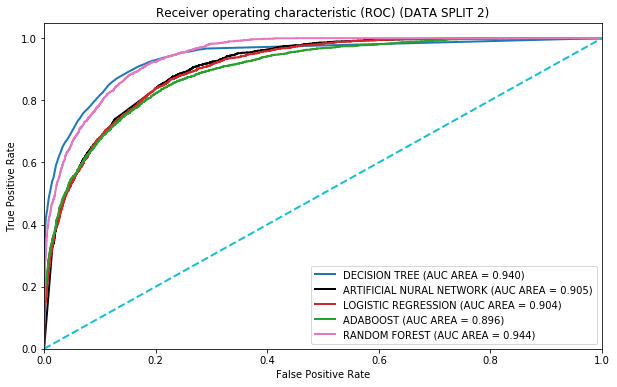

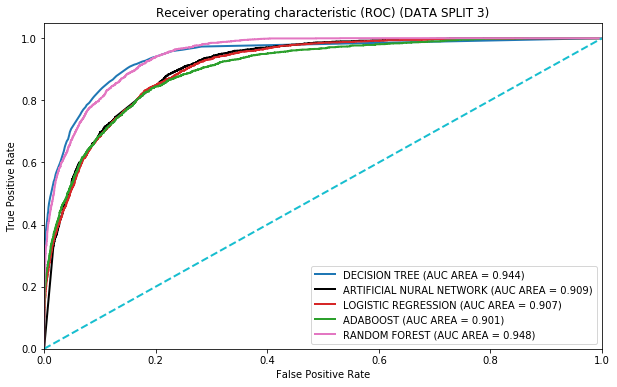

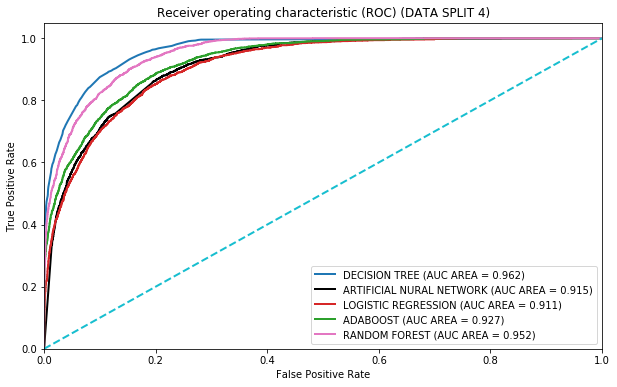

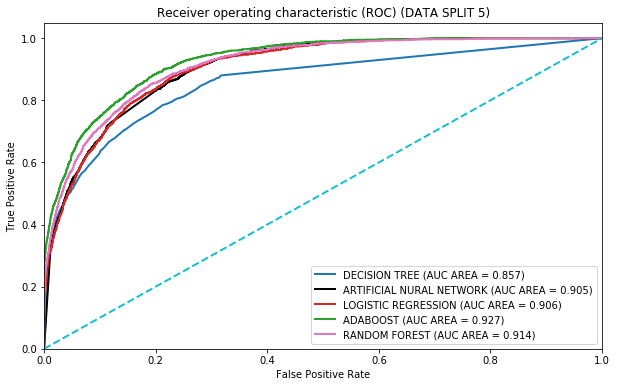

In [217]:
# ROC CURVE FOR EACH MODELS / FOR EACH SPLIT
printmd("### ROC Curves for each model per each split")
print(print_color_blue,"As AUC area becomes the more closer to 1, it is the more accurate, and the more closer to \
0 the least accurate it is")
labels = ['DECISION TREE','ARTIFICIAL NURAL NETWORK','LOGISTIC REGRESSION','ADABOOST','RANDOM FOREST']
color = ['tab:blue', 'k', 'tab:red', 'tab:green','tab:pink']

j = 0
while j < 5:
    plt.figure(figsize=(10,6))
    y_test = label_binarize(adult_Y_test[j], classes=[' <=50K', ' >50K'])
    i = 0
    while i < 5:
        y_score =  (my_trainers_for_splits_all[j][i]).predict_proba(adult_X_test[j])
        pos_class_index = list(np.unique(my_predictors_for_splits_all[j][i])).index(' >50K')
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
        auc = roc_auc_score(y_test.ravel(), y_score[:,pos_class_index])
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=2, label=labels[i]+' (AUC AREA = '+str('%.3f'%(auc))+')')
        i=i+1
    j=j+1    
    plt.plot([0, 1], [0, 1], color='tab:cyan', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) (DATA SPLIT '+str(j)+')')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')